最大似然估计

通过最大似然估计来预估车辆数目


(1000,)


(array([  0.,   0.,   2.,   7.,  20.,  35.,  65.,  74., 114., 133., 116.,
        117., 105.,  79.,  48.,  35.,  21.,  10.,  12.,   3.,   2.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

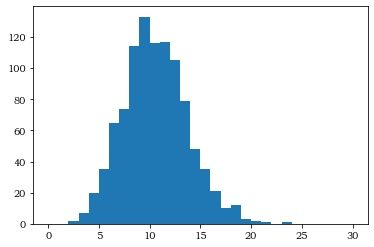

In [2]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

data=poisson.rvs(mu=10,size=1000)
print(data.shape)
plt.hist(data,bins=30,range=[0,30])

In [3]:
import sympy

# 估计似然函数
# x,theta=sympy.symbols("x theta",positive=True)
x,theta=sympy.symbols("x theta")
phi=(theta**x/sympy.factorial(x))*sympy.exp(-theta) # 泊松分布函数
sympy.pprint(phi)
L=np.prod([phi.subs(x,i) for i in data]) # 似然函数
print(L)
# 求解最大似然估值是的 theta 值
logL=sympy.expand_log(sympy.log(L))
sol=sympy.solve(sympy.diff(logL,theta),theta)
print(sol)

 x  -θ
θ ⋅ℯ  
──────
  x!  
theta**10091*exp(-1000*theta)/221557694227104241832410023595359733596922377367931602238364714033104361399170907160972177079249877492024417111785228066157472552520102539650496201655753344325449676073380611823289399625108399578381017220109895738421426325329837859698157596517540464869598261132355076424871710272888224036972188714280448195710472407414595601449773994424180106847363498686308613020087858563965875382721957913784737330206947924774438897821989403782182365848671333063907652955082354710166444109101411516410417082556525251173404008298219173928613995858684223793965176423990433394163306651550147630779961426201614123792881822451668932981538040014674297732185466963167632856638591513193302225814913249720611575889362729638227277592770257608583290155194090889092551666316746238197403704994272351916256830967316017166938650062469490628779476132936337747693349880156979742406347852281676525526561201962269790285847916230139185795195967662726561770226301755406440457145

In [10]:
def poission(x):
    """
    泊松分布
    Args:
        x:
    Returns:
    """
    theta1=sympy.Float(sol[0])
    return float(theta1**x)/sympy.factorial(x)*sympy.exp(-theta1)

sum=.0
for i in range(5,15):
    p=poission(i)
    sum+=p
    print("p(i={0})={1}".format(i,p))
print(sum)

p(i=5)=0.0361429975198126
p(i=6)=0.0607864979954049
p(i=7)=0.0876280787530901
p(i=8)=0.110531867837179
p(i=9)=0.123930786482775
p(i=10)=0.125058556639768
p(i=11)=0.114724172277445
p(i=12)=0.0964734685376418
p(i=13)=0.0748856746933341
p(i=14)=0.0539765245236025
0.884138625260053
